In [108]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [109]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7e07de43d0daa01003fdb8c68ed96c45


In [4]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7e07de43d0daa01003fdb8c68ed96c45&q=Boston


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
print(coordinates)

[(-17.174623015519515, -168.34714843594253), (-80.82340016245602, 170.7138241265086), (4.420656555362854, -147.0934894017843), (-20.58656934751538, -175.7405860421153), (-43.83289561975488, -107.7776462319553), (-70.34433124525701, 143.88492016532945), (-79.62279505813652, 104.46646564188279), (-67.70823559236533, -100.87303852427574), (71.20852813129594, 34.70281219656701), (-34.11156130893216, 134.75236222473012), (-52.48900305554008, -137.62397356825022), (-88.30259353648523, 91.44821715766284), (-46.96872481292872, 41.18646693359119), (-60.35685310521353, 115.50879191327812), (-58.05693944375403, 109.52017933997939), (-3.76039747464975, -131.31903253513212), (-11.569058692935528, -175.6936652909458), (-85.95046168563736, 136.5464312668936), (81.62254990007344, -14.533750678527667), (24.40676710003079, 95.92548561560886), (31.271026346855905, -113.0584898443935), (-23.738145447726225, 161.57676758367057), (-14.720870833110894, -85.27400865150125), (36.94873336769258, 0.8108471431036

In [7]:
print(len(coordinates))

1500


In [8]:
print(coordinates[0])

(-17.174623015519515, -168.34714843594253)


In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 85.89,
  'feels_like': 86.67,
  'temp_min': 79.38,
  'temp_max': 90.45,
  'pressure': 1007,
  'humidity': 46},
 'visibility': 10000,
 'wind': {'speed': 10, 'deg': 296, 'gust': 21.99},
 'clouds': {'all': 75},
 'dt': 1621793732,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1621761337,
  'sunset': 1621814804},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [11]:
# Get the JSON data.
boston_data = city_weather.json()

In [12]:
boston_data["sys"]

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1621761337,
 'sunset': 1621814804}

In [13]:
boston_data["sys"]["country"]

'US'

In [14]:
boston_data["main"]["temp_max"]

90.45

In [15]:
boston_data["coord"]["lat"]

42.3584

In [16]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
country = boston_data["sys"]["country"]
print(lat,lng,max_temp,humidity,clouds,wind,country)

42.3584 -71.0598 90.45 46 75 10 US


In [17]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-05-23 18:15:32'

In [18]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | alofi
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | polyarnyy
Processing Record 10 of Set 1 | port lincoln
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 13 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | katha
City not found. Skipping...
Processing Record 16 of Set 1 | puerto penasco
Processing Record 17 of Set 1 | koumac
Processing Record 18 of Set 1 | hualmay
Processing Record 19 of Set 1 | sidi ali
Processing Record 20 of Set 1 | buala
Processing Record 21 

Processing Record 33 of Set 4 | banda aceh
Processing Record 34 of Set 4 | hasaki
Processing Record 35 of Set 4 | kamina
Processing Record 36 of Set 4 | touros
Processing Record 37 of Set 4 | san patricio
Processing Record 38 of Set 4 | anchorage
Processing Record 39 of Set 4 | mount isa
Processing Record 40 of Set 4 | bethel
Processing Record 41 of Set 4 | aykhal
Processing Record 42 of Set 4 | carutapera
Processing Record 43 of Set 4 | college
Processing Record 44 of Set 4 | lebu
Processing Record 45 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 46 of Set 4 | uray
Processing Record 47 of Set 4 | fairbanks
Processing Record 48 of Set 4 | eureka
Processing Record 49 of Set 4 | doha
Processing Record 50 of Set 4 | ribeira grande
Processing Record 1 of Set 5 | cilegon
Processing Record 2 of Set 5 | sisimiut
Processing Record 3 of Set 5 | kenai
Processing Record 4 of Set 5 | san quintin
Processing Record 5 of Set 5 | maniitsoq
Processing Record 6 of Set 5 | souilla

Processing Record 23 of Set 8 | marseille
Processing Record 24 of Set 8 | saint-philippe
Processing Record 25 of Set 8 | morondava
Processing Record 26 of Set 8 | te anau
Processing Record 27 of Set 8 | zhengjiatun
Processing Record 28 of Set 8 | hamilton
Processing Record 29 of Set 8 | kawalu
Processing Record 30 of Set 8 | yarmouth
Processing Record 31 of Set 8 | lagoa
Processing Record 32 of Set 8 | sinnamary
Processing Record 33 of Set 8 | salinas
Processing Record 34 of Set 8 | higuey
City not found. Skipping...
Processing Record 35 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 36 of Set 8 | falealupo
City not found. Skipping...
Processing Record 37 of Set 8 | haines junction
Processing Record 38 of Set 8 | geresk
City not found. Skipping...
Processing Record 39 of Set 8 | halalo
City not found. Skipping...
Processing Record 40 of Set 8 | tshane
Processing Record 41 of Set 8 | arroyo
Processing Record 42 of Set 8 | bafoulabe
Processing Record 43 of Set 8 | pa

Processing Record 11 of Set 12 | mount pleasant
Processing Record 12 of Set 12 | sirsa
Processing Record 13 of Set 12 | tsiroanomandidy
Processing Record 14 of Set 12 | san rafael del sur
Processing Record 15 of Set 12 | korla
Processing Record 16 of Set 12 | prokopyevsk
Processing Record 17 of Set 12 | carlyle
Processing Record 18 of Set 12 | key west
Processing Record 19 of Set 12 | khrebtovaya
Processing Record 20 of Set 12 | phalombe
Processing Record 21 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 22 of Set 12 | svetlyy
Processing Record 23 of Set 12 | astara
Processing Record 24 of Set 12 | phuket
Processing Record 25 of Set 12 | sakado
Processing Record 26 of Set 12 | totma
Processing Record 27 of Set 12 | beloha
Processing Record 28 of Set 12 | jimenez
Processing Record 29 of Set 12 | ostrovnoy
Processing Record 30 of Set 12 | kudahuvadhoo
Processing Record 31 of Set 12 | sorong
Processing Record 32 of Set 12 | mahadday weyne
City not found. Skipping...
P

In [20]:
len(city_data)

546

### Convert array of dictionary to pandas DataFrame

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Alofi,-19.0595,-169.9187,76.89,100,49,3.44,NU,2021-05-23 18:15:33
1,Bluff,-46.6000,168.3333,46.33,70,28,8.72,NZ,2021-05-23 18:15:34
2,Atuona,-9.8000,-139.0333,79.61,80,53,20.04,PF,2021-05-23 18:15:34
3,Vaini,-21.2000,-175.2000,73.56,88,90,6.91,TO,2021-05-23 18:15:34
4,Castro,-24.7911,-50.0119,64.63,47,5,12.41,BR,2021-05-23 18:15:35
5,Hobart,-42.8794,147.3294,45.05,91,53,4.00,AU,2021-05-23 18:15:03
6,Albany,42.6001,-73.9662,81.75,54,90,5.99,US,2021-05-23 18:13:13
7,Punta Arenas,-53.1500,-70.9167,41.11,84,90,10.60,CL,2021-05-23 18:12:12
8,Polyarnyy,69.1989,33.4478,36.07,68,48,6.53,RU,2021-05-23 18:15:36
9,Port Lincoln,-34.7333,135.8667,66.16,46,100,19.46,AU,2021-05-23 18:15:36


In [22]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [23]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Alofi,NU,2021-05-23 18:15:33,-19.0595,-169.9187,76.89,100,49,3.44
1,Bluff,NZ,2021-05-23 18:15:34,-46.6000,168.3333,46.33,70,28,8.72
2,Atuona,PF,2021-05-23 18:15:34,-9.8000,-139.0333,79.61,80,53,20.04
3,Vaini,TO,2021-05-23 18:15:34,-21.2000,-175.2000,73.56,88,90,6.91
4,Castro,BR,2021-05-23 18:15:35,-24.7911,-50.0119,64.63,47,5,12.41
5,Hobart,AU,2021-05-23 18:15:03,-42.8794,147.3294,45.05,91,53,4.00
6,Albany,US,2021-05-23 18:13:13,42.6001,-73.9662,81.75,54,90,5.99
7,Punta Arenas,CL,2021-05-23 18:12:12,-53.1500,-70.9167,41.11,84,90,10.60
8,Polyarnyy,RU,2021-05-23 18:15:36,69.1989,33.4478,36.07,68,48,6.53
9,Port Lincoln,AU,2021-05-23 18:15:36,-34.7333,135.8667,66.16,46,100,19.46


In [110]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


### Latitude and Temperature

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [26]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'05/23/21'

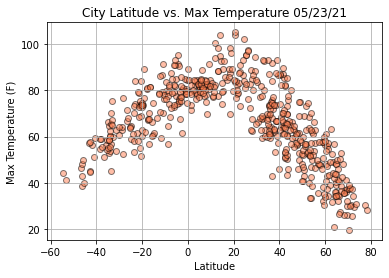

In [70]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", color = "coral", linewidths=1, marker="o",
            alpha=0.5, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

### Latitude Vs Humidity

In [32]:
len(city_data_df["Humidity"])

546

In [45]:
len(city_data_df["Lat"])

546

ValueError: x and y must be the same size

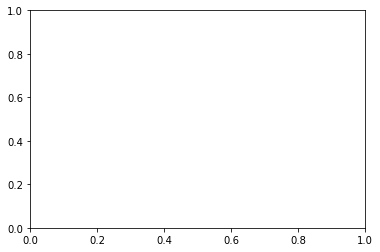

In [69]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.5, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

### Latitude and Cloudiness

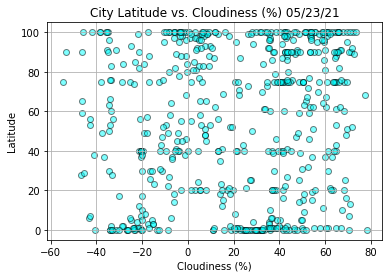

In [68]:
# Build the scatter plots for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            color = "cyan", alpha=0.5, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

### Latitude vs Wind speed

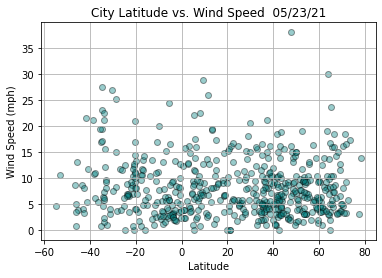

In [47]:
# Build the scatter plots for latitude vs. Wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            color = "teal", alpha=0.4, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed  "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

### Regression Analysis

In [174]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [215]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values , color = "coral",edgecolor = "black", linewidth = 1 , alpha = 0.5)
    plt.plot(x_values,regress_values,"r")
    print('\033[92m'+'\033[1m'+"Correlation Coefficient (R-squared)={}" \
          .format(round(r_value,3))+'\033[0m')
    print('\033[94m'+'\033[1m'+"p-value (level of statistical significance) = {}" \
          .format(round(p_value,7))+'\033[0m')
    print('\033[96m'+'\033[1m'+"Standard error of estimate = {}" \
          .format(round(std_err,3))+'\033[0m')
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [216]:
index_13 = city_data_df.loc[13]
index_13

City                      Hualmay
Country                        PE
Date          2021-05-23 18:15:38
Lat                      -11.0964
Lng                      -77.6139
Max Temp                    70.12
Humidity                       70
Cloudiness                     52
Wind Speed                   9.44
Name: 13, dtype: object

In [217]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
6,Albany,US,2021-05-23 18:13:13,42.6001,-73.9662,81.75,54,90,5.99
8,Polyarnyy,RU,2021-05-23 18:15:36,69.1989,33.4478,36.07,68,48,6.53
11,Puerto Penasco,MX,2021-05-23 18:15:37,31.3167,-113.5333,76.91,44,0,7.00
14,Sidi Ali,DZ,2021-05-23 18:15:38,36.0998,0.4206,64.09,79,100,9.31
16,Bermeo,ES,2021-05-23 18:15:39,43.4209,-2.7215,69.66,65,41,4.21


In [218]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Alofi,NU,2021-05-23 18:15:33,-19.0595,-169.9187,76.89,100,49,3.44
1,Bluff,NZ,2021-05-23 18:15:34,-46.6000,168.3333,46.33,70,28,8.72
2,Atuona,PF,2021-05-23 18:15:34,-9.8000,-139.0333,79.61,80,53,20.04
3,Vaini,TO,2021-05-23 18:15:34,-21.2000,-175.2000,73.56,88,90,6.91
4,Castro,BR,2021-05-23 18:15:35,-24.7911,-50.0119,64.63,47,5,12.41


### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

Correlation Coefficient (R-squared)=-0.823
p-value (level of statistical significance) = 0.0
Standard error of estimate = 0.027


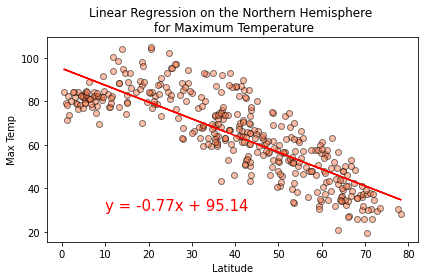

In [219]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,30))

### Linear Regression on max Temp for Southern Hemisphere

Correlation Coefficient (R-squared)=0.79
p-value (level of statistical significance) = 0.0
Standard error of estimate = 0.044


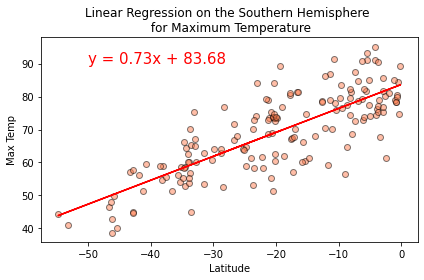

In [220]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,90))

### Linear Regression on Humidity for Northern Hemisphere

Correlation Coefficient (R-squared)=0.109
p-value (level of statistical significance) = 0.0340622
Standard error of estimate = 0.058


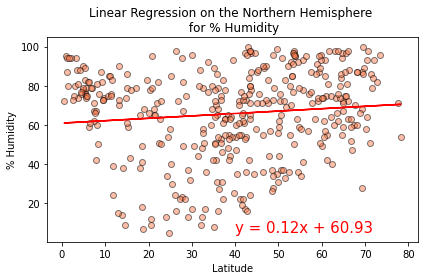

In [221]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,5))

Correlation Coefficient (R-squared)=0.165
p-value (level of statistical significance) = 0.0338887
Standard error of estimate = 0.115


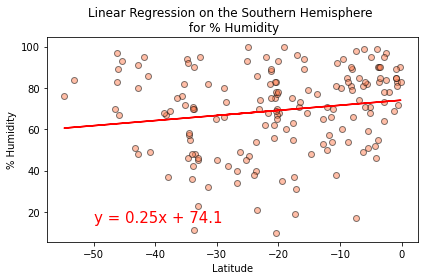

In [222]:
# Linear regression on the Southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call. the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for % Humidity", "% Humidity", (-50,15))

### Linear Regression on the Percent Cloudiness for the Northern Hemisphere


Correlation Coefficient (R-squared)=0.084
p-value (level of statistical significance) = 0.1026167
Standard error of estimate = 0.027


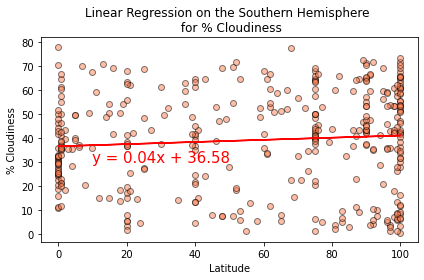

In [227]:
# Linear regression on the Northern hemisphere
x_values = northern_hemi_df["Cloudiness"]
y_values = northern_hemi_df["Lat"]
# Call. the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for % Cloudiness", "% Cloudiness", (10,30))

Correlation Coefficient (R-squared)=0.117
p-value (level of statistical significance) = 0.13299
Standard error of estimate = 0.029


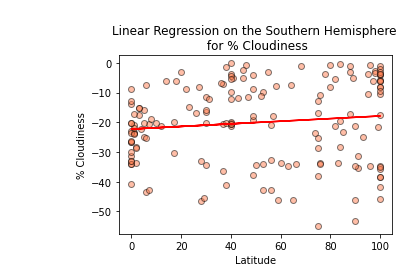

In [228]:
# Linear regression on the Southern hemisphere
x_values = southern_hemi_df["Cloudiness"]
y_values = southern_hemi_df["Lat"]
# Call. the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for % Cloudiness", "% Cloudiness", (-50,15))

### Latitude and Wind Speed

Correlation Coefficient (R-squared)=-0.036
p-value (level of statistical significance) = 0.4867047
Standard error of estimate = 0.014


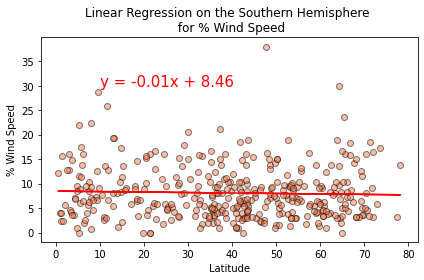

In [229]:
# Linear regression on the Northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call. the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for % Wind Speed", "% Wind Speed", (10,30))

Correlation Coefficient (R-squared)=-0.036
p-value (level of statistical significance) = 0.4867047
Standard error of estimate = 0.014


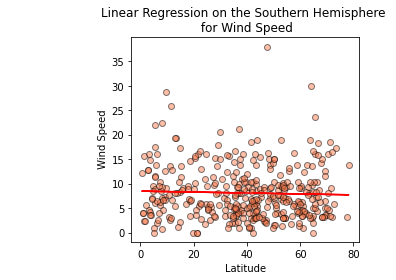

In [230]:
# Linear regression on the Southern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call. the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for Wind Speed", " Wind Speed", (-50,15))